# Trustchain analysis 

In this notebook we will analyze Trustchain protocol by simulating malicious agents and showing the convergence of the protocol under attack. 

**WIP**

Main features of Trustchain: 
- *No enforcing of total order*: one chain per account
- *Selfish agents*: each peer/client is responsible for it's own security and is choosing parameters and strategies based to optimize own benefit.
- *Bilateral interaction as main building brick*: any transaction is an interaction between two agents, and requires confirmations from both parties. 
- *Resilience through 'Entanglement'*: to achieve tamper-proofness agents interact and link their chains with each other.  



In this notebook we will build up Trustchain protocol simulation and how under which parameters it will converge. 


In [1]:
# Initialize the experiment:
import networkx as nx
from p2psimpy import BaseSimulation
import warnings
warnings.filterwarnings('ignore')

# Load the previous experiment configurations
exper = BaseSimulation.load_experiment(expr_dir='crash_gossip')

Locations, topology, peer_services, serv_impl = exper



In [2]:
from p2psimpy.utils import prepare_topology

G = prepare_topology(100, 3)


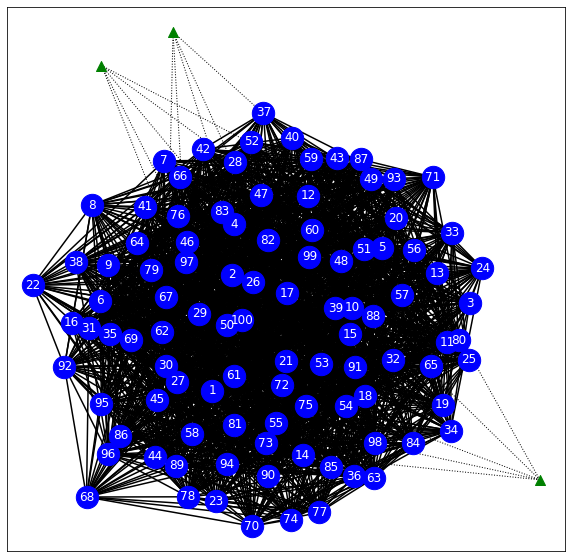

In [3]:
from p2psimpy.visual import visualize_peer_client_network

visualize_peer_client_network(G)

In [ ]:
# Client discovering peers [Brahms algorithm] => 
# Run a random walk from the client + another client running a random walk from the other hand 


# 1. Client creates transaction
# 2. Sends to the network 
# 3. Network uses gossip to exchange information about the client
# 4. Client K receives the transaction, uses signature for accepting transaction. => 





#



In [4]:
sim = BaseSimulation(Locations, G, peer_services, serv_impl, logger_dir='exp')

In [5]:
sim.run(5000)

In [6]:
sim.peers[101].storage['msg_data'].txs

{'101_1': GossipMessage:QTLVQUGIVROINGFFSBRL,
 '101_2': GossipMessage:YNKUPXKCYSIQJPKQZMYE,
 '101_3': GossipMessage:XILYWNFEHOMVIUBOPSFL,
 '101_4': GossipMessage:YHHZIDJVYBFMMXWTPPRH,
 '101_5': GossipMessage:EZTTQTTNUTXOTXQJXWXG,
 '101_6': GossipMessage:IWWNGPJVRCJXHWIGPILC,
 '101_7': GossipMessage:VBIUBTUDYEPKEHQZMCEI,
 '101_8': GossipMessage:OKOHAUELYCTWOQXHTDIY,
 '101_9': GossipMessage:LRPIVGKSCCVQUMHWMRNG,
 '101_10': GossipMessage:JVIGPPXDYGQDTSIROPWE,
 '101_11': GossipMessage:QLPYALIDBOZHSVOCQFXY,
 '101_12': GossipMessage:TMGJAQPCFFZQBOPAOMDR,
 '101_13': GossipMessage:NKLRGXKRZRDZBRCYRTCG,
 '101_14': GossipMessage:AACMNYIMZBOZUYAFTMQB,
 '101_15': GossipMessage:OHUFILAUILWNBVYIIMQT,
 '101_16': GossipMessage:LKUJURPOTYKIRTPXKXSK,
 '101_17': GossipMessage:MIEELSRPGNCRBLRCLTAK,
 '101_18': GossipMessage:OZCOJUMZSKIFGWCCHIZA,
 '101_19': GossipMessage:CPMEAZDAMDXXIZQFMRBF,
 '101_20': GossipMessage:ZXEDZMTTTQUIHHKHOCHK}

In [ ]:
# Initialize the accounts with balances 
from p2psimpy import LimitedMessageProducer, BaseMessage


class Transaction(BaseMessage):
    pass

class InitBalance(LimitedMessageProducer):
    
    def produce_transaction(self):
        data = ''.join(random.choices(string.ascii_uppercase, k=20))
        
        msg_id = '_'.join((str(self.counter), str(self.peer.peer_id)))
        
        msg_ttl = self.init_ttl
        msg = GossipMessage(self.peer, msg_id, data, msg_ttl,
                            pre_task=self.pre_task, post_task=self.post_task)

        self.peer.gossip(msg,
                         self.init_fanout)
        self.peer.store('msg_time', str(self.counter), self.peer.env.now)
        self.peer.store('msg_data', str(self.counter), msg)
        self.counter += 1
        
        data = Transaction(self.peer, data={''})
